In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols

In [2]:
pd.set_option('display.max_columns', 500)

In [87]:
df = pd.read_pickle('better_data.pickle')

In [88]:
df.columns = [col.lower().replace('%','_pct') for col in df.columns]

In [89]:
df = df.drop('rk',axis=1)

In [90]:
df = df.sort_values(by=['player','season']).reset_index().drop('index',axis=1)

In [91]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [92]:
# https://help.yahoo.com/kb/fantasy-basketball/default-league-settings-fantasy-basketball-sln6919.html
# yahoo's fantasy scoring system
pts = 1
reb = 1.2
ast = 1.5
blk = 3
stl = 3
tov = -1

In [93]:
df['ftsy_pts']=(df.pts*1)+(df.trb*1.2)+(df.ast*1.5)+(df.blk*3)+(df.stl*3)-(df.tov)

In [94]:
df = df.merge(df.groupby('player').min()[['age']],how='left', left_on='player', right_index=True, suffixes=('','_min'))

In [95]:
df['experience'] = df.age - df.age_min

In [96]:
df.season = [int(s[:4])+1 for s in df.season]

In [68]:
positions = pd.read_pickle('player_positions.pickle')
pos_df = pd.DataFrame(positions)
pos_df.pos = [''.join([s[0] for s in player['pos'].split()]).replace('a','/') for player in positions]
pos_df.head()

,p_id,player,pos
0,abdelal01,Alaa Abdelnaby,PF
1,abdulza01,Zaid Abdul-Aziz,C/PF
2,abdulka01,Kareem Abdul-Jabbar,C
3,abdulma02,Mahmoud Abdul-Rauf,PG
4,abdulta01,Tariq Abdul-Wahad,SG


In [104]:
poop = [p for p in list(set(pos_df.p_id)) if '01' not in p]

In [106]:
poop

['abdulma02',
 'alexaco02',
 'allenra02',
 'anderan02',
 'anderda02',
 'anderda03',
 'barneha02',
 'barneji02',
 'barnema02',
 'bensoke02',
 'bertada02',
 'bogdabo02',
 'bradlal02',
 'bradlbi02',
 'brewero02',
 'bridgmi02',
 'brownan02',
 'brownbo02',
 'brownda02',
 'brownde02',
 'brownde03',
 'brownde04',
 'brownge02',
 'brownja02',
 'brownle02',
 'brownma02',
 'brownra02',
 'brownro02',
 'brownst02',
 'buntibi02',
 'burtode02',
 'butlemi02',
 'collido02',
 'collija02',
 'collija03',
 'collija04',
 'cookda02',
 'cottoja02',
 'crawfjo02',
 'davisan02',
 'davisbr02',
 'davisch02',
 'davisjo02',
 'davisma02',
 'davismi02',
 'davismi03',
 'daviswa02',
 'daviswa03',
 'drewla02',
 'dudlech02',
 'duffybo02',
 'dumasri02',
 'dunlemi02',
 'edwarja02',
 'ellisbo02',
 'ellisle02',
 'evansja02',
 'ewingpa02',
 'fordal02',
 'fordsh02',
 'fulleto02',
 'garnebi02',
 'garredi02',
 'grantje02',
 'greenda02',
 'greenje02',
 'greenke02',
 'greensi02',
 'guokama02',
 'hairspj02',
 'hamilda02',
 'hamiljo0

In [107]:
pos_df[pos_df.p_id == 'johnsch03']

,p_id,player,pos
2067,johnsch03,Chris Johnson,C


In [108]:
df[df.player == 'Chris Johnson']

,player,age,tm,lg,per,gs,ws,season,g,mp,fg,fga,2p,2pa,3p,3pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,2p_pct,3p_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience
2460,Chris Johnson,25,TOT,NBA,10.2,1,0.2,2011,14,138,9,21,9,21,0,0,15,20,12,20,32,3,3,9,10,21,33,0.429,0.429,NaN,0.429,0.750,0.554,101.9,22,3
2461,Chris Johnson,26,TOT,NBA,10.8,0,0.2,2012,27,175,20,41,20,41,0,0,15,19,15,25,40,2,6,9,15,33,55,0.488,0.488,NaN,0.488,0.789,0.557,136.0,22,4
2462,Chris Johnson,27,MIN,NBA,18.4,0,1.0,2013,30,284,48,75,48,75,0,0,21,34,20,40,60,8,7,28,13,49,117,0.640,0.640,NaN,0.640,0.618,0.650,293.0,22,5
2463,Chris Johnson,22,MEM,NBA,10.7,0,0.2,2013,8,102,11,25,5,7,6,18,1,2,5,6,11,2,4,0,3,5,29,0.440,0.714,0.333,0.560,0.500,0.560,54.2,22,0
2464,Chris Johnson,23,BOS,NBA,10.8,0,1.4,2014,40,789,85,214,42,87,43,127,37,43,31,66,97,31,27,4,22,63,250,0.397,0.483,0.339,0.498,0.860,0.537,483.9,22,1
2465,Chris Johnson,24,TOT,NBA,10.2,2,0.8,2015,29,526,62,154,34,59,28,95,14,16,8,47,55,15,26,7,15,44,166,0.403,0.576,0.295,0.494,0.875,0.515,338.5,22,2
2466,Chris Johnson,25,UTA,NBA,8.2,2,1.1,2016,70,857,72,194,45,95,27,99,34,42,27,105,132,45,32,20,40,100,205,0.371,0.474,0.273,0.441,0.810,0.482,546.9,22,3


In [71]:
df = df.merge(pos_df, how='left', on='player').drop(['age_min', 'p_id'], axis=1)

In [63]:
df.head()

,player,age,tm,lg,per,gs,ws,season,g,mp,fg,fga,2p,2pa,3p,3pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,2p_pct,3p_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience
0,A.C. Green,22,LAL,NBA,11.8,1,3.3,1986,82,1542,209,388,208,382,1,6,102,167,160,221,381,54,49,49,99,229,521,0.539,0.545,0.167,0.540,0.611,0.564,1254.2,22,0
1,A.C. Green,23,LAL,NBA,15.7,72,7.6,1987,79,2240,316,587,316,582,0,5,220,282,210,405,615,84,70,80,102,171,852,0.538,0.543,0.000,0.538,0.780,0.599,2064.0,22,1
2,A.C. Green,24,LAL,NBA,14.5,64,7.9,1988,82,2636,322,640,322,638,0,2,293,379,245,465,710,93,87,45,120,204,937,0.503,0.505,0.000,0.503,0.773,0.581,2204.5,22,2
3,A.C. Green,25,LAL,NBA,17.8,82,9.4,1989,82,2510,401,758,397,741,4,17,282,359,258,481,739,103,94,55,119,172,1088,0.529,0.536,0.235,0.532,0.786,0.594,2457.3,22,3
4,A.C. Green,26,LAL,NBA,14.7,82,7.7,1990,82,2709,385,806,372,760,13,46,278,370,262,450,712,90,66,50,116,207,1061,0.478,0.489,0.283,0.486,0.751,0.548,2282.4,22,4


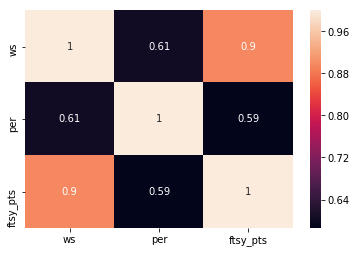

In [61]:
sns.heatmap(df[['ws','per','ftsy_pts']].corr(), annot=True)
plt.show()